In [1]:
import numpy as np

want a function that takes a function (X :-> Y) to slowly ramp up to max each time the functions called

e.g :
``` python
func = increase(linear, steps = 20)
func()
out : 0.025
func()
out : 0.05
func()
out : 0.075
```
you see, can now do something like this:
```python
for x in params list:
    model.set_params(x)
    model.fit(X_train[:len(x_train)*func()], y_train[:len(x_train)*func()])
```

self counting function incrementally increasing exposure to data set to speed up training.

In [2]:
def increase(func, steps = 50):
    def inner_obj(count = [0]):
        count[0] += 1
        x = min([1, count[0] / steps]) # if called more than steps times, start returning just 1
        return func(x)
    return inner_obj


def linear(x):
    return(x)

def squared(x):
    return(x**2)

In [3]:
test = increase(linear, steps = 5)
for i in range(5):
    print(test())

0.2
0.4
0.6
0.8
1


In [4]:
tset2 = increase(squared, steps = 5)
for i in range(8):
    print(tset2())

0.04000000000000001
0.16000000000000003
0.36
0.6400000000000001
1
1
1
1


As the wrap essentially just increases in linear increments, one only needs to create a function f:\[0,1\] -> Y, to any desired range and plug it in

i.e i want an exponential increase starting at 3 going to 100

will map interval \[0,1\] -> \[e^0, e^1\] with f(x) = e^x then map that to \[3, 100\] via [this method](https://math.stackexchange.com/questions/914823/shift-numbers-into-a-different-range)

In [5]:
def exp_3_100(x):
    return 3 + (((100 - 3)/(np.exp(1)-1))*(np.exp(x)-1))

In [6]:
inc_exp = increase(exp_3_100, steps = 500)
list = []
for i in range(500):
    list.append([i,inc_exp()])

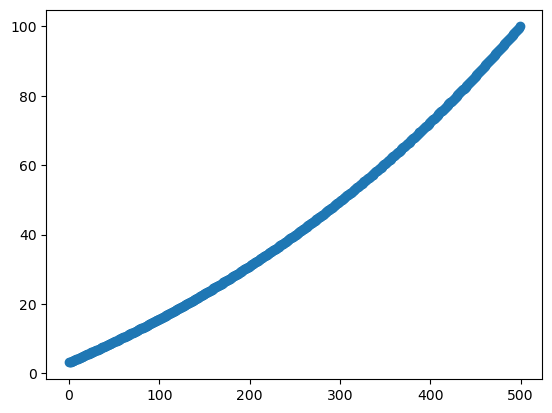

In [7]:
import matplotlib.pyplot as plt
plt.scatter([i[0] for i in list], [i[1] for i in list])
plt.show()


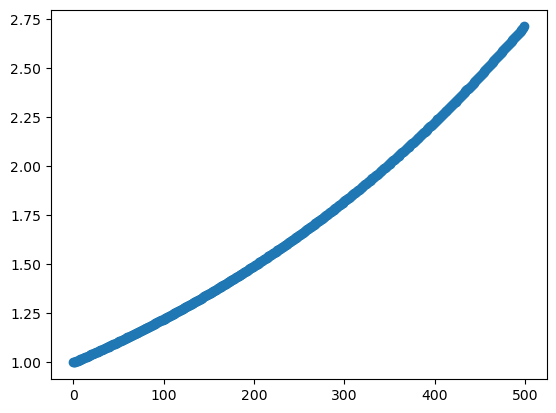

In [8]:
exp = []
for i in range(500):
    exp.append([i,np.exp(i/500)])
plt.scatter([i[0] for i in exp], [i[1] for i in exp])
plt.show()
